# Capstone IBM

Data source:
https://www.kaggle.com/sobhanmoosavi/us-accidents

### Acknowledgements 
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

Author
Ronghui Zhou, zhou.uf@gmail.com https://github.com/RonghuiZhou

## Import libraries

In [1]:

import pandas as pd
import numpy as np
from io import StringIO
import pydotplus
import seaborn as sns

import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Import Data

In [2]:

df=pd.read_csv(r'US_Accidents_June20.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

## Basic Distribution Severity

Text(0.5, 1.0, 'Count Accidents by Severity')

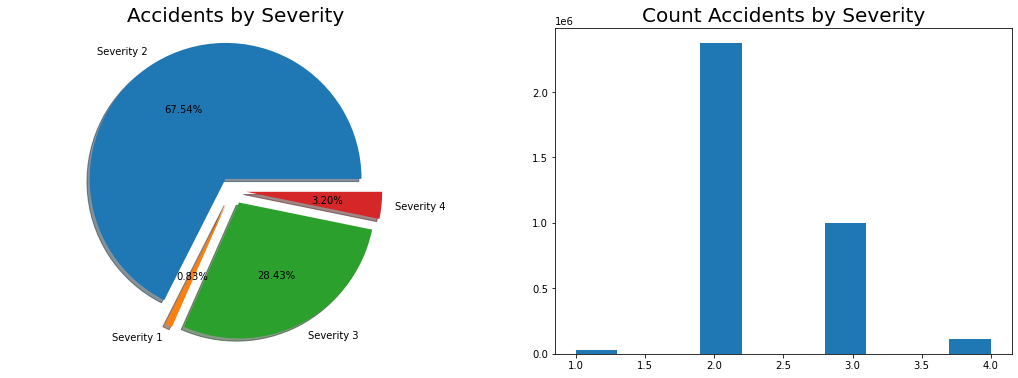

In [3]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
sizes = df.groupby('Severity').size()
sizes = sizes[[2,1,3,4]]
labels = 'Severity 2','Severity 1', 'Severity 3', 'Severity 4' 
explode = (0.1,0.1,0.1,0.1)
ax[0].pie(sizes, explode=explode, labels= labels,autopct='%1.2f%%',shadow=True, startangle=0)
ax[0].axis('equal') 
ax[0].set_title('Accidents by Severity', size=20)

ax[1].hist(df['Severity'])
ax[1].set_title('Count Accidents by Severity', size=20)

## Dealing with nulls, NaNs, Outliers and missing data.

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

ID
False    3513617
Name: ID, dtype: int64

Source
False    3513617
Name: Source, dtype: int64

TMC
False    2478818
True     1034799
Name: TMC, dtype: int64

Severity
False    3513617
Name: Severity, dtype: int64

Start_Time
False    3513617
Name: Start_Time, dtype: int64

End_Time
False    3513617
Name: End_Time, dtype: int64

Start_Lat
False    3513617
Name: Start_Lat, dtype: int64

Start_Lng
False    3513617
Name: Start_Lng, dtype: int64

End_Lat
True     2478818
False    1034799
Name: End_Lat, dtype: int64

End_Lng
True     2478818
False    1034799
Name: End_Lng, dtype: int64

Distance(mi)
False    3513617
Name: Distance(mi), dtype: int64

Description
False    3513616
True           1
Name: Description, dtype: int64

Number
True     2262864
False    1250753
Name: Number, dtype: int64

Street
False    3513617
Name: Street, dtype: int64

Side
False    3513617
Name: Side, dtype: int64

City
False    3513505
True         112
Name: City, dtype: int64

County
False    3513617
Name: Coun

## Replace missing values

In [6]:
median = df['TMC'].median()
df['TMC'].fillna(median, inplace=True)

new = df['Start_Lat']
df['End_Lat'].fillna(new, inplace=True)

new = df['Start_Lng']
df['End_Lng'].fillna(new, inplace=True)

freq = df['Description'].value_counts().idxmax()
df['Description'].fillna(freq, inplace=True)

median = df['Number'].median()
df['Number'].fillna(median, inplace=True)

freq = df['City'].value_counts().idxmax()
df['City'].fillna(freq, inplace=True)

freq = df['Zipcode'].value_counts().idxmax()
df['Zipcode'].fillna(freq, inplace=True)

freq = df['Timezone'].value_counts().idxmax()
df['Timezone'].fillna(freq, inplace=True)

freq = df['Airport_Code'].value_counts().idxmax()
df['Airport_Code'].fillna(freq, inplace=True)

freq = df['Weather_Timestamp'].value_counts().idxmax()
df['Weather_Timestamp'].fillna(freq, inplace=True)

freq = df['Temperature(F)'].value_counts().idxmax()
df['Temperature(F)'].fillna(freq, inplace=True)

median = df['Wind_Chill(F)'].median()
df['Wind_Chill(F)'].fillna(median, inplace=True)

freq = df['Humidity(%)'].value_counts().idxmax()
df['Humidity(%)'].fillna(freq, inplace=True)

median = df['Pressure(in)'].median()
df['Pressure(in)'].fillna(median, inplace=True)

median = df['Visibility(mi)'].median()
df['Visibility(mi)'].fillna(median, inplace=True)

freq = df['Wind_Direction'].value_counts().idxmax()
df['Wind_Direction'].fillna(freq, inplace=True)

freq = df['Wind_Speed(mph)'].value_counts().idxmax()
df['Wind_Speed(mph)'].fillna(freq, inplace=True)

freq = df['Precipitation(in)'].value_counts().idxmax()
df['Precipitation(in)'].fillna(freq, inplace=True)

freq = df['Weather_Condition'].value_counts().idxmax()
df['Weather_Condition'].fillna(freq, inplace=True)

freq = df['Sunrise_Sunset'].value_counts().idxmax()
df['Sunrise_Sunset'].fillna(freq, inplace=True)

freq = df['Civil_Twilight'].value_counts().idxmax()
df['Civil_Twilight'].fillna(freq, inplace=True)

freq = df['Nautical_Twilight'].value_counts().idxmax()
df['Nautical_Twilight'].fillna(freq, inplace=True)

freq = df['Astronomical_Twilight'].value_counts().idxmax()
df['Astronomical_Twilight'].fillna(freq, inplace=True)

## Validating

In [7]:
missing_data = df.isnull()
missing_data.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

ID
False    3513617
Name: ID, dtype: int64

Source
False    3513617
Name: Source, dtype: int64

TMC
False    3513617
Name: TMC, dtype: int64

Severity
False    3513617
Name: Severity, dtype: int64

Start_Time
False    3513617
Name: Start_Time, dtype: int64

End_Time
False    3513617
Name: End_Time, dtype: int64

Start_Lat
False    3513617
Name: Start_Lat, dtype: int64

Start_Lng
False    3513617
Name: Start_Lng, dtype: int64

End_Lat
False    3513617
Name: End_Lat, dtype: int64

End_Lng
False    3513617
Name: End_Lng, dtype: int64

Distance(mi)
False    3513617
Name: Distance(mi), dtype: int64

Description
False    3513617
Name: Description, dtype: int64

Number
False    3513617
Name: Number, dtype: int64

Street
False    3513617
Name: Street, dtype: int64

Side
False    3513617
Name: Side, dtype: int64

City
False    3513617
Name: City, dtype: int64

County
False    3513617
Name: County, dtype: int64

State
False    3513617
Name: State, dtype: int64

Zipcode
False    3513617
Name: Zip

## Basic Description of data...

In [9]:
#Select attributes for the model
df_corr=df.corr()

In [10]:
df_corr=df_corr['Severity'].abs()
df_corr=df_corr.sort_values(ascending=False)
df_corr=df_corr[1:25]
df_corr


Traffic_Signal       0.191531
Distance(mi)         0.150326
Crossing             0.138368
TMC                  0.131999
End_Lng              0.083706
Start_Lng            0.083705
Junction             0.060086
Stop                 0.053500
Wind_Chill(F)        0.049886
Station              0.048260
End_Lat              0.047623
Start_Lat            0.047617
Amenity              0.044494
Pressure(in)         0.038368
Number               0.037541
Humidity(%)          0.035378
Temperature(F)       0.026489
Wind_Speed(mph)      0.023700
Railway              0.023492
Give_Way             0.007747
Precipitation(in)    0.007436
No_Exit              0.006705
Traffic_Calming      0.006073
Visibility(mi)       0.005540
Name: Severity, dtype: float64

## Distribution by Correlation

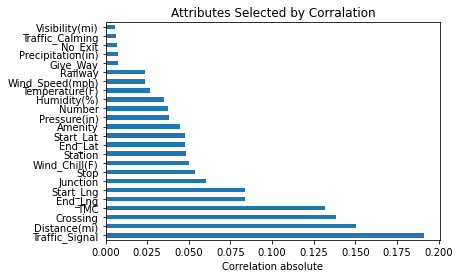

In [11]:
df_corr.plot(kind='barh')
plt.title('Attributes Selected by Corralation')
plt.xlabel('Correlation absolute')
plt.show() 

In [12]:
df.describe(include='all')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,3513617,3513617,3.513617e+06,3.513617e+06,3513617,3513617,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,...,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617,3513617
unique,3513617,3,NaN,NaN,3200042,3246120,NaN,NaN,NaN,NaN,...,2,2,2,2,2,1,2,2,2,2
top,A-1511253,MapQuest,NaN,NaN,2017-05-15 09:22:55,2017-05-15 15:22:55,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,2414301,NaN,NaN,74,73,NaN,NaN,NaN,NaN,...,3513433,3443296,3461641,3512216,2889994,3513617,2593872,2768036,2943513,3075116
mean,NaN,NaN,2.059544e+02,2.339929e+00,NaN,NaN,3.654195e+01,-9.579151e+01,3.654194e+01,-9.579147e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.773360e+01,5.521935e-01,NaN,NaN,4.883520e+00,1.736877e+01,4.883503e+00,1.736876e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.000000e+02,1.000000e+00,NaN,NaN,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.010000e+02,2.000000e+00,NaN,NaN,3.363784e+01,-1.174418e+02,3.363784e+01,-1.174419e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.010000e+02,2.000000e+00,NaN,NaN,3.591687e+01,-9.102601e+01,3.591684e+01,-9.102598e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.010000e+02,3.000000e+00,NaN,NaN,4.032217e+01,-8.093299e+01,4.032217e+01,-8.093288e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting basics x,y

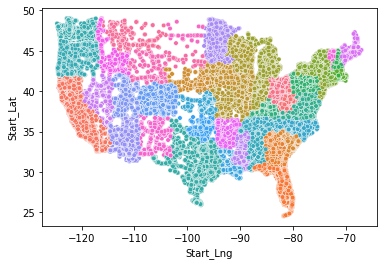

In [13]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State', legend=False, s=20)
plt.show()

## Description principal Attributes

## Traffic Signal vs Severity

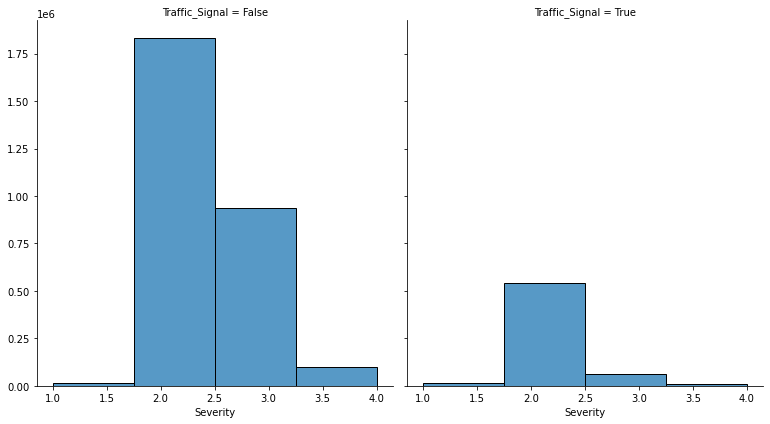

In [14]:

bins = np.linspace(df.Severity.min(), df.Severity.max(), 5)
g = sns.FacetGrid(df, col="Traffic_Signal",height=6, palette="flare", aspect=.90, col_wrap=2)
g.map(sns.histplot, "Severity", bins=bins)

## Distance (mi) vs Severity

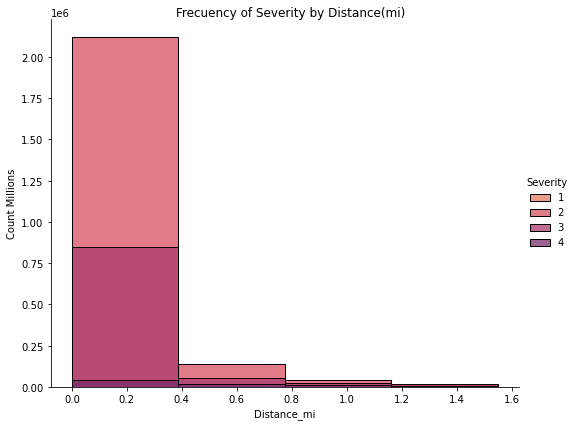

In [15]:
df.rename(columns={'Distance(mi)':'Distance_mi'}, inplace=True)
bins = np.linspace(df.Distance_mi.min(), df.Distance_mi.std(),5)
g = sns.FacetGrid(df, hue="Severity", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Distance_mi", bins=bins)
g.fig.suptitle("Frecuency of Severity by Distance(mi)")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()
df.rename(columns={'Distance_mi':'Distance(mi)'}, inplace=True)

<AxesSubplot:xlabel='Severity', ylabel='Distance(mi)'>

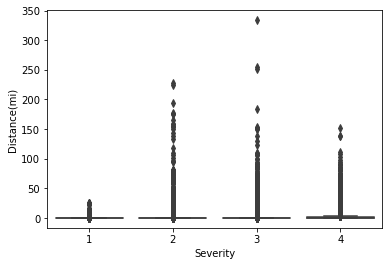

In [16]:
sns.boxplot(x="Severity", y="Distance(mi)", data=df)

## Crossing vs Severity

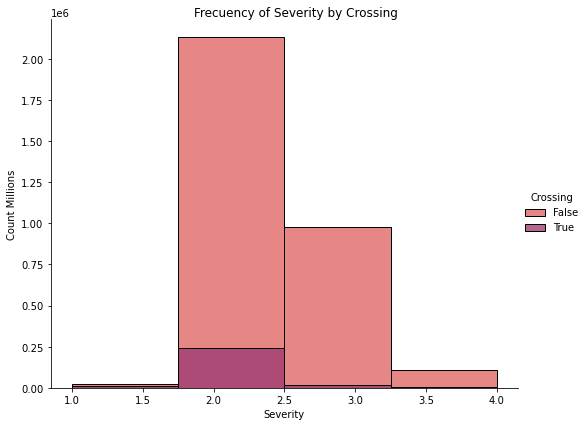

In [17]:

bins = np.linspace(df.Severity.min(), df.Severity.max(), 5)
g = sns.FacetGrid(df, hue="Crossing", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Severity", bins=bins)
g.fig.suptitle("Frecuency of Severity by Crossing")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()

## TMC vs Severity

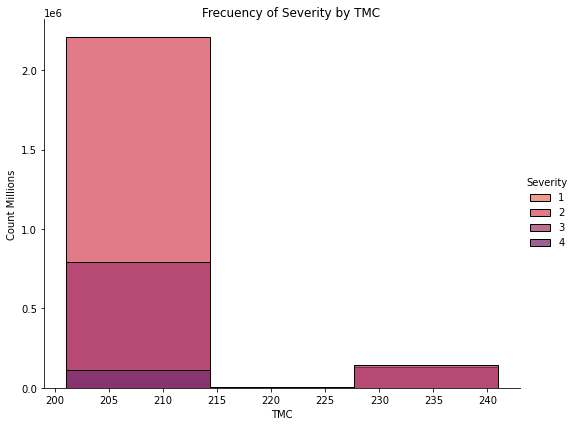

In [18]:

bins = np.linspace(201, 241,4)
g = sns.FacetGrid(df, hue="Severity", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "TMC", bins=bins)
g.fig.suptitle("Frecuency of Severity by TMC")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()

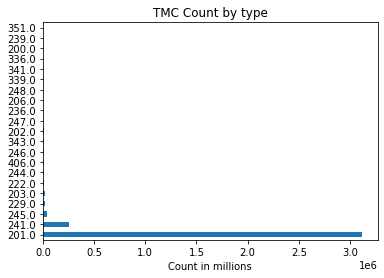

In [19]:

freq_TMC = df['TMC'].value_counts()
freq_TMC.plot(kind='barh')
plt.title('TMC Count by type')
plt.xlabel('Count in millions')
plt.show() 


## Junction Vs Severity

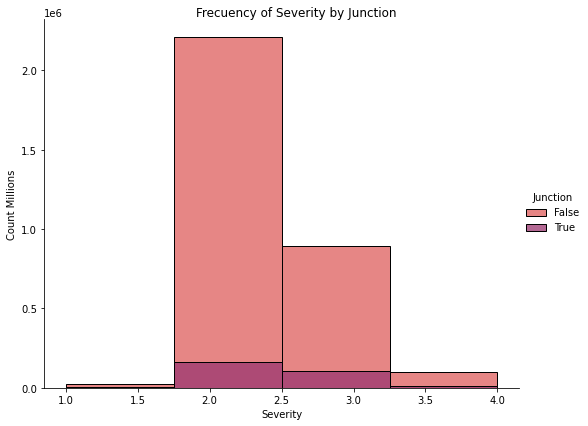

In [20]:
bins = np.linspace(df.Severity.min(), df.Severity.max(), 5)
g = sns.FacetGrid(df, hue="Junction", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Severity", bins=bins)
g.fig.suptitle("Frecuency of Severity by Junction")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()

## Stop vs Severity

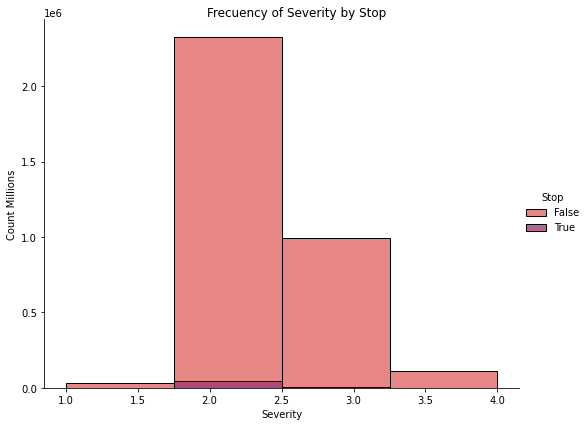

In [21]:
bins = np.linspace(df.Severity.min(), df.Severity.max(), 5)
g = sns.FacetGrid(df, hue="Stop", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Severity", bins=bins)
g.fig.suptitle("Frecuency of Severity by Stop")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()

## Station vs Severity

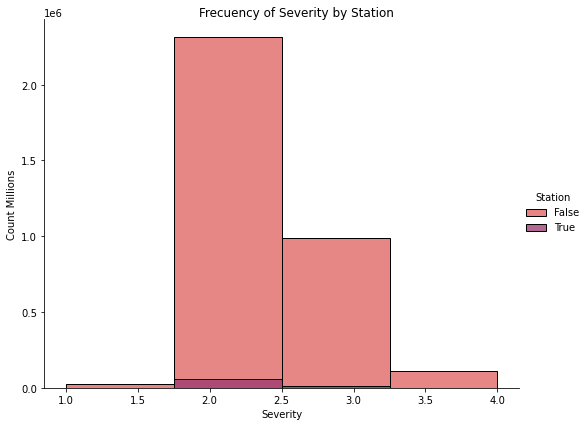

In [22]:
bins = np.linspace(df.Severity.min(), df.Severity.max(), 5)
g = sns.FacetGrid(df, hue="Station", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Severity", bins=bins)
g.fig.suptitle("Frecuency of Severity by Station")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()

## Amenity vs Severity

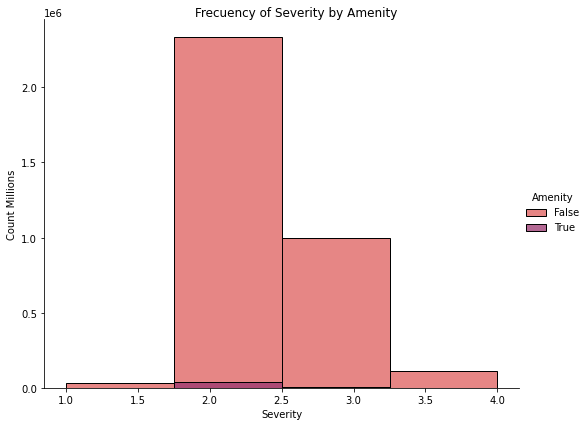

In [23]:
bins = np.linspace(df.Severity.min(), df.Severity.max(), 5)
g = sns.FacetGrid(df, hue="Amenity", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Severity", bins=bins)
g.fig.suptitle("Frecuency of Severity by Amenity")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()

## Start Lat vs Severity

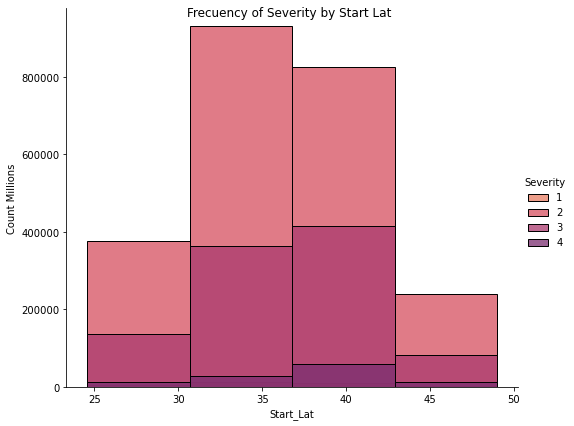

In [24]:

bins = np.linspace(df.Start_Lat.min(), df.Start_Lat.max(),5)
g = sns.FacetGrid(df, hue="Severity", palette="flare", height=6, aspect=1.20)
g.map(sns.histplot, "Start_Lat", bins=bins)
g.fig.suptitle("Frecuency of Severity by Start Lat")
g.add_legend()
g.set_ylabels("Count Millions")
plt.show()


## Defining Features for the Model

In [25]:
#features for x axe
features=df_corr.index.tolist()
features


['Traffic_Signal',
 'Distance(mi)',
 'Crossing',
 'TMC',
 'End_Lng',
 'Start_Lng',
 'Junction',
 'Stop',
 'Wind_Chill(F)',
 'Station',
 'End_Lat',
 'Start_Lat',
 'Amenity',
 'Pressure(in)',
 'Number',
 'Humidity(%)',
 'Temperature(F)',
 'Wind_Speed(mph)',
 'Railway',
 'Give_Way',
 'Precipitation(in)',
 'No_Exit',
 'Traffic_Calming',
 'Visibility(mi)']

In [26]:
x=df[features]

In [27]:
y=df['Severity'].values

## Preprocessing the Model

In [28]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.46452874, -0.17522141, -0.29112545, -0.27937673,  0.67550864,
         0.67551064, -0.29679521, -0.12253507,  0.09854989, -0.1429076 ,
         0.68049585,  0.68049322, -0.11010002, -0.08222406, -0.12486823,
         1.09310791, -1.36200756, -0.62285786, -0.09461528, -0.05224376,
         0.10525316, -0.0353451 , -0.01997232,  0.3004176 ],
       [-0.46452874, -0.17522141, -0.29112545, -0.27937673,  0.74618377,
         0.74618571, -0.29679521, -0.12253507,  0.09854989, -0.1429076 ,
         0.69337841,  0.69337573, -0.11010002, -0.11855542, -0.14849362,
         1.48359924, -1.30784913, -0.62285786, -0.09461528, -0.05224376,
        -0.05382806, -0.0353451 , -0.01997232,  0.3004176 ],
       [ 2.15271932, -0.17522141, -0.29112545, -0.27937673,  0.6770122 ,
         0.6770142 , -0.29679521, -0.12253507, -1.35020892, -0.1429076 ,
         0.51626965,  0.5162676 , -0.11010002, -0.09433451, -0.12486823,
         1.48359924, -1.41075014, -0.84031011, -0.09461528, -0.05224376,
  

In [29]:

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2810893, 24) (2810893,)
Test set: (702724, 24) (702724,)


## Modeling Decision Tree 

In [30]:


#Modeling
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#train
loanTree.fit(x_train,y_train)

#Prediction
yhat = loanTree.predict(x_test)

Algorithm='Decision Tree'
Jaccard=jaccard_score(y_test, yhat, average='weighted')
F1_score=f1_score(y_test, yhat, average='weighted')
Accuracy=metrics.accuracy_score(y_test, yhat)
LogLoss='NA'

em_df = pd.DataFrame(columns=('Algorithm', 'Jaccard', 'F1_score', 'LogLoss','Accuracy'))
em_df.loc[len(em_df)]=[Algorithm,Jaccard,F1_score,LogLoss,Accuracy]
    


## Modeling Logistic Regression

In [31]:
#Logistic Regression

#Modeling
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

#Predict
yhat = LR.predict(x_test)

#Predict Prob
yhat_prob = LR.predict_proba(x_test)

Algorithm='Logistic Regression'
Jaccard=jaccard_score(y_test, yhat, average='weighted')
F1_score=f1_score(y_test, yhat, average='weighted')
Accuracy=metrics.accuracy_score(y_test, yhat)
LogLoss=log_loss(y_test, yhat_prob)

em_df.loc[len(em_df)]=[Algorithm,Jaccard,F1_score,LogLoss,Accuracy]



## Summary of model

In [32]:
em_df.style.hide_index()

Algorithm,Jaccard,F1_score,LogLoss,Accuracy
Decision Tree,0.527681,0.677101,NA,0.682432
Logistic Regression,0.507619,0.626959,0.697687,0.698150


Created by: Juan Carlos Zambrano